## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  16.879282  1404.777160  0.003000  4.698986  0.165893
1  99.243463   745.716484  0.377831  4.905058  1.342880
2  78.416215  1110.354287  0.663842  7.413239  1.399476
3  54.394806  1517.789797  0.348662  8.273188  1.576747
4   3.221836   610.018379  0.095738  2.997726  1.520175


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.47704 | train_mse: 2.5742  | train_mae: 1.22509 |  0:00:00s
epoch 1  | loss: 0.73114 | train_mse: 3.29872 | train_mae: 1.36759 |  0:00:00s
epoch 2  | loss: 0.72499 | train_mse: 1.51453 | train_mae: 0.94929 |  0:00:00s


epoch 3  | loss: 0.48931 | train_mse: 2.30134 | train_mae: 1.11762 |  0:00:00s
epoch 4  | loss: 0.48937 | train_mse: 4.25098 | train_mae: 1.45041 |  0:00:00s
epoch 5  | loss: 0.29395 | train_mse: 6.62327 | train_mae: 1.79074 |  0:00:00s


epoch 6  | loss: 0.31784 | train_mse: 5.98165 | train_mae: 1.72631 |  0:00:00s
epoch 7  | loss: 0.27543 | train_mse: 4.79386 | train_mae: 1.56024 |  0:00:00s
epoch 8  | loss: 0.26536 | train_mse: 4.03256 | train_mae: 1.43296 |  0:00:00s
epoch 9  | loss: 0.20052 | train_mse: 3.34781 | train_mae: 1.29797 |  0:00:00s


epoch 10 | loss: 0.23595 | train_mse: 3.0125  | train_mae: 1.23629 |  0:00:00s
epoch 11 | loss: 0.30788 | train_mse: 3.35315 | train_mae: 1.32016 |  0:00:01s
epoch 12 | loss: 0.37688 | train_mse: 2.63478 | train_mae: 1.15472 |  0:00:01s
epoch 13 | loss: 0.19863 | train_mse: 3.59358 | train_mae: 1.27525 |  0:00:01s


epoch 14 | loss: 0.23295 | train_mse: 4.39177 | train_mae: 1.37847 |  0:00:01s
epoch 15 | loss: 0.23733 | train_mse: 3.92195 | train_mae: 1.32229 |  0:00:01s
epoch 16 | loss: 0.13665 | train_mse: 3.48531 | train_mae: 1.28638 |  0:00:01s
epoch 17 | loss: 0.20472 | train_mse: 2.6405  | train_mae: 1.11961 |  0:00:01s


epoch 18 | loss: 0.17387 | train_mse: 2.42863 | train_mae: 1.03813 |  0:00:01s
epoch 19 | loss: 0.24829 | train_mse: 2.61468 | train_mae: 0.98771 |  0:00:01s
epoch 20 | loss: 0.19713 | train_mse: 1.76853 | train_mae: 0.81954 |  0:00:01s


epoch 21 | loss: 0.32117 | train_mse: 0.97824 | train_mae: 0.63131 |  0:00:01s
epoch 22 | loss: 0.19975 | train_mse: 0.77433 | train_mae: 0.56814 |  0:00:01s
epoch 23 | loss: 0.20315 | train_mse: 0.92773 | train_mae: 0.62291 |  0:00:01s


epoch 24 | loss: 0.17525 | train_mse: 0.87825 | train_mae: 0.6179  |  0:00:01s
epoch 25 | loss: 0.17724 | train_mse: 1.0733  | train_mae: 0.68715 |  0:00:02s
epoch 26 | loss: 0.20157 | train_mse: 0.82011 | train_mae: 0.61485 |  0:00:02s
epoch 27 | loss: 0.2598  | train_mse: 0.63808 | train_mae: 0.54382 |  0:00:02s


epoch 28 | loss: 0.23865 | train_mse: 0.44122 | train_mae: 0.46096 |  0:00:02s
epoch 29 | loss: 0.1506  | train_mse: 0.59115 | train_mae: 0.50992 |  0:00:02s


epoch 30 | loss: 0.16069 | train_mse: 0.6395  | train_mae: 0.50885 |  0:00:02s
epoch 31 | loss: 0.10712 | train_mse: 0.5112  | train_mae: 0.43956 |  0:00:02s
epoch 32 | loss: 0.19122 | train_mse: 0.49655 | train_mae: 0.43382 |  0:00:02s


epoch 33 | loss: 0.26566 | train_mse: 0.41285 | train_mae: 0.40293 |  0:00:02s
epoch 34 | loss: 0.17228 | train_mse: 0.15953 | train_mae: 0.28753 |  0:00:02s
epoch 35 | loss: 0.32748 | train_mse: 0.08899 | train_mae: 0.22146 |  0:00:02s
epoch 36 | loss: 0.12476 | train_mse: 0.09354 | train_mae: 0.22745 |  0:00:02s


epoch 37 | loss: 0.13697 | train_mse: 0.1423  | train_mae: 0.25505 |  0:00:02s
epoch 38 | loss: 0.14332 | train_mse: 0.18572 | train_mae: 0.27363 |  0:00:03s
epoch 39 | loss: 0.23399 | train_mse: 0.17285 | train_mae: 0.26555 |  0:00:03s


epoch 40 | loss: 0.11935 | train_mse: 0.20925 | train_mae: 0.28239 |  0:00:03s
epoch 41 | loss: 0.19909 | train_mse: 0.26804 | train_mae: 0.32208 |  0:00:03s
epoch 42 | loss: 0.16975 | train_mse: 0.16915 | train_mae: 0.27601 |  0:00:03s


epoch 43 | loss: 0.1725  | train_mse: 0.13612 | train_mae: 0.25074 |  0:00:03s
epoch 44 | loss: 0.22375 | train_mse: 0.19565 | train_mae: 0.28142 |  0:00:03s


epoch 45 | loss: 0.15949 | train_mse: 0.13117 | train_mae: 0.23627 |  0:00:03s
epoch 46 | loss: 0.24519 | train_mse: 0.14745 | train_mae: 0.23807 |  0:00:03s
epoch 47 | loss: 0.16496 | train_mse: 0.19014 | train_mae: 0.2535  |  0:00:03s


epoch 48 | loss: 0.15463 | train_mse: 0.17636 | train_mae: 0.24674 |  0:00:03s
epoch 49 | loss: 0.117   | train_mse: 0.19199 | train_mae: 0.27887 |  0:00:04s
epoch 50 | loss: 0.20311 | train_mse: 0.16393 | train_mae: 0.266   |  0:00:04s


epoch 51 | loss: 0.21723 | train_mse: 0.12824 | train_mae: 0.27198 |  0:00:04s
epoch 52 | loss: 0.23235 | train_mse: 0.2718  | train_mae: 0.33934 |  0:00:04s
epoch 53 | loss: 0.13317 | train_mse: 0.19637 | train_mae: 0.28781 |  0:00:04s


epoch 54 | loss: 0.13367 | train_mse: 0.1144  | train_mae: 0.24127 |  0:00:04s
epoch 55 | loss: 0.23032 | train_mse: 0.11631 | train_mae: 0.26241 |  0:00:04s


epoch 56 | loss: 0.12949 | train_mse: 0.1297  | train_mae: 0.2718  |  0:00:04s
epoch 57 | loss: 0.14243 | train_mse: 0.12254 | train_mae: 0.24836 |  0:00:04s


epoch 58 | loss: 0.1007  | train_mse: 0.07158 | train_mae: 0.21726 |  0:00:04s
epoch 59 | loss: 0.20046 | train_mse: 0.15001 | train_mae: 0.2708  |  0:00:04s
epoch 60 | loss: 0.13295 | train_mse: 0.22104 | train_mae: 0.28318 |  0:00:05s


epoch 61 | loss: 0.21234 | train_mse: 0.17756 | train_mae: 0.28444 |  0:00:05s
epoch 62 | loss: 0.27429 | train_mse: 0.19275 | train_mae: 0.29536 |  0:00:05s
epoch 63 | loss: 0.20575 | train_mse: 0.18984 | train_mae: 0.29025 |  0:00:05s
epoch 64 | loss: 0.17214 | train_mse: 0.14711 | train_mae: 0.26133 |  0:00:05s


epoch 65 | loss: 0.1522  | train_mse: 0.0989  | train_mae: 0.23912 |  0:00:05s
epoch 66 | loss: 0.10765 | train_mse: 0.07403 | train_mae: 0.21307 |  0:00:05s
epoch 67 | loss: 0.15476 | train_mse: 0.08071 | train_mae: 0.22342 |  0:00:05s


epoch 68 | loss: 0.44063 | train_mse: 0.10657 | train_mae: 0.25146 |  0:00:05s
epoch 69 | loss: 0.26405 | train_mse: 0.1285  | train_mae: 0.27635 |  0:00:05s
epoch 70 | loss: 0.16355 | train_mse: 0.16439 | train_mae: 0.29376 |  0:00:05s
epoch 71 | loss: 0.14296 | train_mse: 0.1745  | train_mae: 0.28297 |  0:00:05s


epoch 72 | loss: 0.11538 | train_mse: 0.20237 | train_mae: 0.27845 |  0:00:05s
epoch 73 | loss: 0.2     | train_mse: 0.23972 | train_mae: 0.27966 |  0:00:05s
epoch 74 | loss: 0.23493 | train_mse: 0.24117 | train_mae: 0.28503 |  0:00:06s


epoch 75 | loss: 0.25355 | train_mse: 0.20786 | train_mae: 0.26823 |  0:00:06s
epoch 76 | loss: 0.12651 | train_mse: 0.1468  | train_mae: 0.24898 |  0:00:06s
epoch 77 | loss: 0.18268 | train_mse: 0.09521 | train_mae: 0.23168 |  0:00:06s
epoch 78 | loss: 0.09756 | train_mse: 0.08207 | train_mae: 0.21347 |  0:00:06s


epoch 79 | loss: 0.37664 | train_mse: 0.10366 | train_mae: 0.22439 |  0:00:06s
epoch 80 | loss: 0.19438 | train_mse: 0.19132 | train_mae: 0.27527 |  0:00:06s
epoch 81 | loss: 0.12626 | train_mse: 0.24243 | train_mae: 0.29425 |  0:00:06s


epoch 82 | loss: 0.14442 | train_mse: 0.26352 | train_mae: 0.30738 |  0:00:06s
epoch 83 | loss: 0.23662 | train_mse: 0.23233 | train_mae: 0.30774 |  0:00:06s
epoch 84 | loss: 0.1796  | train_mse: 0.22784 | train_mae: 0.29567 |  0:00:06s
epoch 85 | loss: 0.21225 | train_mse: 0.225   | train_mae: 0.29576 |  0:00:06s


epoch 86 | loss: 0.19547 | train_mse: 0.11824 | train_mae: 0.24423 |  0:00:06s
epoch 87 | loss: 0.14914 | train_mse: 0.09253 | train_mae: 0.22359 |  0:00:06s
epoch 88 | loss: 0.12294 | train_mse: 0.07328 | train_mae: 0.20552 |  0:00:06s
epoch 89 | loss: 0.08033 | train_mse: 0.06777 | train_mae: 0.19946 |  0:00:07s


epoch 90 | loss: 0.11395 | train_mse: 0.07279 | train_mae: 0.20713 |  0:00:07s
epoch 91 | loss: 0.0925  | train_mse: 0.06858 | train_mae: 0.20087 |  0:00:07s
epoch 92 | loss: 0.17645 | train_mse: 0.06412 | train_mae: 0.20002 |  0:00:07s
epoch 93 | loss: 0.10165 | train_mse: 0.05756 | train_mae: 0.18803 |  0:00:07s


epoch 94 | loss: 0.22885 | train_mse: 0.06548 | train_mae: 0.20296 |  0:00:07s
epoch 95 | loss: 0.11873 | train_mse: 0.07017 | train_mae: 0.20513 |  0:00:07s
epoch 96 | loss: 0.08104 | train_mse: 0.06884 | train_mae: 0.19794 |  0:00:07s


epoch 97 | loss: 0.09565 | train_mse: 0.06975 | train_mae: 0.19641 |  0:00:07s
epoch 98 | loss: 0.20389 | train_mse: 0.07784 | train_mae: 0.20278 |  0:00:07s
epoch 99 | loss: 0.09703 | train_mse: 0.13411 | train_mae: 0.23657 |  0:00:07s
epoch 100| loss: 0.15007 | train_mse: 0.16411 | train_mae: 0.24648 |  0:00:07s


epoch 101| loss: 0.0953  | train_mse: 0.15536 | train_mae: 0.24494 |  0:00:07s
epoch 102| loss: 0.08902 | train_mse: 0.16891 | train_mae: 0.26149 |  0:00:07s
epoch 103| loss: 0.12043 | train_mse: 0.19088 | train_mae: 0.26676 |  0:00:07s
epoch 104| loss: 0.15435 | train_mse: 0.19913 | train_mae: 0.26807 |  0:00:08s


epoch 105| loss: 0.12231 | train_mse: 0.17187 | train_mae: 0.25888 |  0:00:08s
epoch 106| loss: 0.12733 | train_mse: 0.16334 | train_mae: 0.25962 |  0:00:08s
epoch 107| loss: 0.13735 | train_mse: 0.16245 | train_mae: 0.2768  |  0:00:08s
epoch 108| loss: 0.12269 | train_mse: 0.15798 | train_mae: 0.26772 |  0:00:08s


epoch 109| loss: 0.10484 | train_mse: 0.19247 | train_mae: 0.27823 |  0:00:08s
epoch 110| loss: 0.14003 | train_mse: 0.09895 | train_mae: 0.22826 |  0:00:08s
epoch 111| loss: 0.1856  | train_mse: 0.08218 | train_mae: 0.21464 |  0:00:08s


epoch 112| loss: 0.1108  | train_mse: 0.16055 | train_mae: 0.27841 |  0:00:08s
epoch 113| loss: 0.28579 | train_mse: 0.25265 | train_mae: 0.33992 |  0:00:08s
epoch 114| loss: 0.17114 | train_mse: 0.15102 | train_mae: 0.2759  |  0:00:08s
epoch 115| loss: 0.09845 | train_mse: 0.09771 | train_mae: 0.22804 |  0:00:08s


epoch 116| loss: 0.14252 | train_mse: 0.06878 | train_mae: 0.20015 |  0:00:08s
epoch 117| loss: 0.08488 | train_mse: 0.05486 | train_mae: 0.18431 |  0:00:08s
epoch 118| loss: 0.0829  | train_mse: 0.05381 | train_mae: 0.18205 |  0:00:09s


epoch 119| loss: 0.11918 | train_mse: 0.05489 | train_mae: 0.18066 |  0:00:09s
epoch 120| loss: 0.13496 | train_mse: 0.0624  | train_mae: 0.19246 |  0:00:09s
epoch 121| loss: 0.19125 | train_mse: 0.05939 | train_mae: 0.19114 |  0:00:09s


epoch 122| loss: 0.13052 | train_mse: 0.0653  | train_mae: 0.203   |  0:00:09s
epoch 123| loss: 0.08415 | train_mse: 0.09172 | train_mae: 0.22972 |  0:00:09s
epoch 124| loss: 0.08614 | train_mse: 0.11635 | train_mae: 0.24922 |  0:00:09s


epoch 125| loss: 0.23548 | train_mse: 0.13852 | train_mae: 0.27005 |  0:00:09s
epoch 126| loss: 0.06359 | train_mse: 0.16493 | train_mae: 0.29721 |  0:00:09s
epoch 127| loss: 0.16293 | train_mse: 0.1216  | train_mae: 0.26449 |  0:00:09s
epoch 128| loss: 0.08576 | train_mse: 0.08934 | train_mae: 0.24017 |  0:00:09s


epoch 129| loss: 0.1001  | train_mse: 0.06918 | train_mae: 0.20916 |  0:00:09s
epoch 130| loss: 0.08784 | train_mse: 0.06139 | train_mae: 0.20006 |  0:00:09s
epoch 131| loss: 0.0978  | train_mse: 0.05714 | train_mae: 0.19393 |  0:00:09s
epoch 132| loss: 0.19294 | train_mse: 0.05315 | train_mae: 0.18897 |  0:00:10s


epoch 133| loss: 0.10759 | train_mse: 0.05173 | train_mae: 0.18435 |  0:00:10s
epoch 134| loss: 0.10539 | train_mse: 0.05066 | train_mae: 0.18024 |  0:00:10s
epoch 135| loss: 0.06099 | train_mse: 0.05766 | train_mae: 0.19088 |  0:00:10s
epoch 136| loss: 0.19912 | train_mse: 0.06866 | train_mae: 0.19257 |  0:00:10s


epoch 137| loss: 0.20777 | train_mse: 0.06498 | train_mae: 0.19305 |  0:00:10s
epoch 138| loss: 0.12306 | train_mse: 0.06134 | train_mae: 0.18534 |  0:00:10s
epoch 139| loss: 0.13351 | train_mse: 0.05612 | train_mae: 0.17902 |  0:00:10s


epoch 140| loss: 0.07429 | train_mse: 0.06276 | train_mae: 0.19508 |  0:00:10s
epoch 141| loss: 0.27363 | train_mse: 0.05712 | train_mae: 0.18779 |  0:00:10s
epoch 142| loss: 0.0904  | train_mse: 0.05348 | train_mae: 0.18873 |  0:00:10s


epoch 143| loss: 0.16464 | train_mse: 0.07932 | train_mae: 0.22476 |  0:00:10s
epoch 144| loss: 0.07901 | train_mse: 0.07161 | train_mae: 0.21188 |  0:00:10s
epoch 145| loss: 0.19128 | train_mse: 0.05613 | train_mae: 0.19027 |  0:00:10s


epoch 146| loss: 0.14342 | train_mse: 0.06113 | train_mae: 0.18533 |  0:00:11s
epoch 147| loss: 0.1147  | train_mse: 0.07954 | train_mae: 0.20537 |  0:00:11s
epoch 148| loss: 0.07918 | train_mse: 0.11326 | train_mae: 0.22359 |  0:00:11s
epoch 149| loss: 0.08092 | train_mse: 0.13634 | train_mae: 0.23147 |  0:00:11s


epoch 150| loss: 0.15419 | train_mse: 0.08952 | train_mae: 0.2135  |  0:00:11s
epoch 151| loss: 0.10944 | train_mse: 0.05375 | train_mae: 0.17864 |  0:00:11s
epoch 152| loss: 0.24327 | train_mse: 0.06823 | train_mae: 0.20231 |  0:00:11s


epoch 153| loss: 0.09538 | train_mse: 0.09292 | train_mae: 0.22922 |  0:00:11s
epoch 154| loss: 0.10474 | train_mse: 0.0866  | train_mae: 0.22193 |  0:00:11s
epoch 155| loss: 0.07712 | train_mse: 0.08623 | train_mae: 0.225   |  0:00:11s
epoch 156| loss: 0.07657 | train_mse: 0.07464 | train_mae: 0.21188 |  0:00:11s


epoch 157| loss: 0.22875 | train_mse: 0.05554 | train_mae: 0.19222 |  0:00:11s
epoch 158| loss: 0.06915 | train_mse: 0.04729 | train_mae: 0.17458 |  0:00:11s
epoch 159| loss: 0.09474 | train_mse: 0.0514  | train_mae: 0.17914 |  0:00:11s
epoch 160| loss: 0.10798 | train_mse: 0.05914 | train_mae: 0.18233 |  0:00:12s


epoch 161| loss: 0.11233 | train_mse: 0.14658 | train_mae: 0.23251 |  0:00:12s
epoch 162| loss: 0.11097 | train_mse: 0.2149  | train_mae: 0.25167 |  0:00:12s
epoch 163| loss: 0.12819 | train_mse: 0.16582 | train_mae: 0.2401  |  0:00:12s
epoch 164| loss: 0.14908 | train_mse: 0.08255 | train_mae: 0.21681 |  0:00:12s


epoch 165| loss: 0.13564 | train_mse: 0.07373 | train_mae: 0.19755 |  0:00:12s
epoch 166| loss: 0.09797 | train_mse: 0.05794 | train_mae: 0.18548 |  0:00:12s
epoch 167| loss: 0.10389 | train_mse: 0.0575  | train_mae: 0.18452 |  0:00:12s
epoch 168| loss: 0.07232 | train_mse: 0.04786 | train_mae: 0.17644 |  0:00:12s


epoch 169| loss: 0.0843  | train_mse: 0.05983 | train_mae: 0.18793 |  0:00:12s
epoch 170| loss: 0.07335 | train_mse: 0.07301 | train_mae: 0.20179 |  0:00:12s
epoch 171| loss: 0.09035 | train_mse: 0.08082 | train_mae: 0.20989 |  0:00:12s
epoch 172| loss: 0.16969 | train_mse: 0.06445 | train_mae: 0.20013 |  0:00:12s


epoch 173| loss: 0.14632 | train_mse: 0.10817 | train_mae: 0.21025 |  0:00:12s
epoch 174| loss: 0.09257 | train_mse: 0.11868 | train_mae: 0.21505 |  0:00:12s
epoch 175| loss: 0.26439 | train_mse: 0.16319 | train_mae: 0.25294 |  0:00:13s


epoch 176| loss: 0.1188  | train_mse: 0.18465 | train_mae: 0.26481 |  0:00:13s
epoch 177| loss: 0.21129 | train_mse: 0.16097 | train_mae: 0.23923 |  0:00:13s
epoch 178| loss: 0.10623 | train_mse: 0.16398 | train_mae: 0.24403 |  0:00:13s
epoch 179| loss: 0.10462 | train_mse: 0.09895 | train_mae: 0.21765 |  0:00:13s


epoch 180| loss: 0.10133 | train_mse: 0.06095 | train_mae: 0.18567 |  0:00:13s
epoch 181| loss: 0.09224 | train_mse: 0.07172 | train_mae: 0.20787 |  0:00:13s
epoch 182| loss: 0.2428  | train_mse: 0.07129 | train_mae: 0.20898 |  0:00:13s


epoch 183| loss: 0.24913 | train_mse: 0.0632  | train_mae: 0.19297 |  0:00:13s
epoch 184| loss: 0.09266 | train_mse: 0.06306 | train_mae: 0.18971 |  0:00:13s
epoch 185| loss: 0.10808 | train_mse: 0.0676  | train_mae: 0.18684 |  0:00:13s
epoch 186| loss: 0.12298 | train_mse: 0.08441 | train_mae: 0.19821 |  0:00:13s


epoch 187| loss: 0.1082  | train_mse: 0.08325 | train_mae: 0.20347 |  0:00:13s
epoch 188| loss: 0.23198 | train_mse: 0.07089 | train_mae: 0.195   |  0:00:13s
epoch 189| loss: 0.10104 | train_mse: 0.07125 | train_mae: 0.20169 |  0:00:13s
epoch 190| loss: 0.08491 | train_mse: 0.08711 | train_mae: 0.21507 |  0:00:14s


epoch 191| loss: 0.14453 | train_mse: 0.1086  | train_mae: 0.21512 |  0:00:14s
epoch 192| loss: 0.08336 | train_mse: 0.09607 | train_mae: 0.21489 |  0:00:14s
epoch 193| loss: 0.20983 | train_mse: 0.05983 | train_mae: 0.18998 |  0:00:14s
epoch 194| loss: 0.07182 | train_mse: 0.06336 | train_mae: 0.1924  |  0:00:14s


epoch 195| loss: 0.08592 | train_mse: 0.05977 | train_mae: 0.18953 |  0:00:14s
epoch 196| loss: 0.09849 | train_mse: 0.05791 | train_mae: 0.18214 |  0:00:14s
epoch 197| loss: 0.06356 | train_mse: 0.06751 | train_mae: 0.19803 |  0:00:14s


epoch 198| loss: 0.10682 | train_mse: 0.06624 | train_mae: 0.19779 |  0:00:14s
epoch 199| loss: 0.09587 | train_mse: 0.1033  | train_mae: 0.23879 |  0:00:14s
epoch 200| loss: 0.08476 | train_mse: 0.16575 | train_mae: 0.27337 |  0:00:14s
epoch 201| loss: 0.35189 | train_mse: 0.19538 | train_mae: 0.30031 |  0:00:14s


epoch 202| loss: 0.08934 | train_mse: 0.17278 | train_mae: 0.29706 |  0:00:14s
epoch 203| loss: 0.14965 | train_mse: 0.13847 | train_mae: 0.26586 |  0:00:14s
epoch 204| loss: 0.08838 | train_mse: 0.0795  | train_mae: 0.20682 |  0:00:14s
epoch 205| loss: 0.11461 | train_mse: 0.05971 | train_mae: 0.18887 |  0:00:15s


epoch 206| loss: 0.0648  | train_mse: 0.06868 | train_mae: 0.20347 |  0:00:15s
epoch 207| loss: 0.10601 | train_mse: 0.06458 | train_mae: 0.19702 |  0:00:15s
epoch 208| loss: 0.07823 | train_mse: 0.04871 | train_mae: 0.18049 |  0:00:15s

Early stopping occurred at epoch 208 with best_epoch = 158 and best_train_mae = 0.17458
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

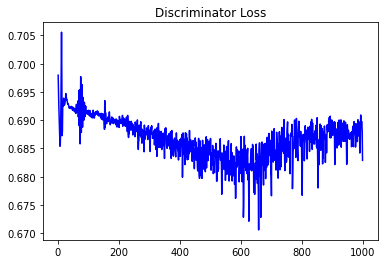

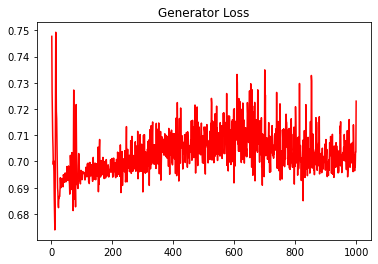

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1597361335047586


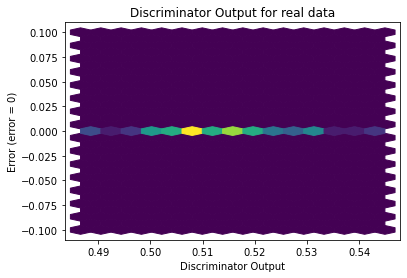

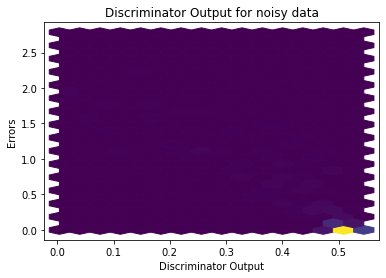

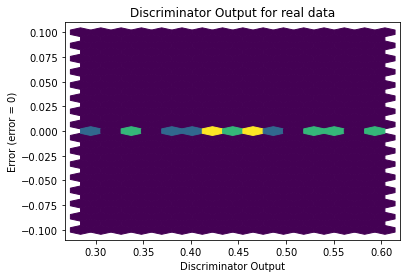

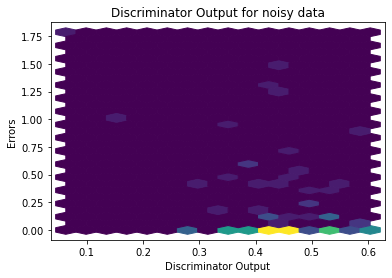

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


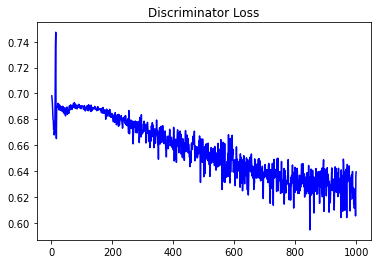

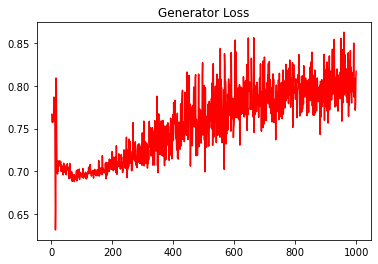

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0981015693899128


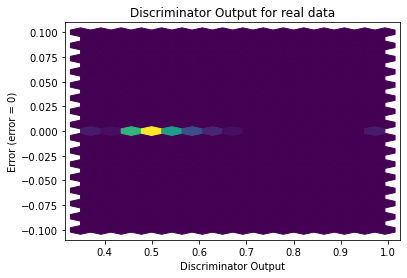

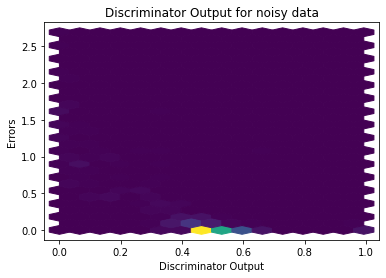

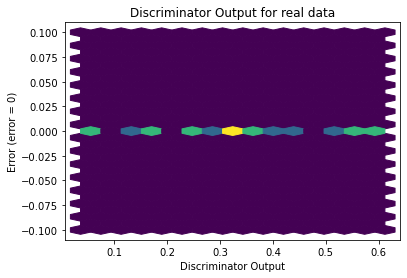

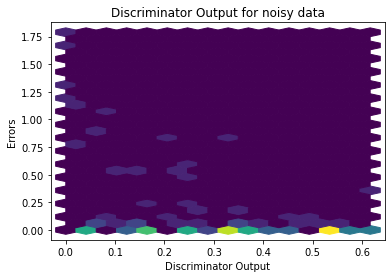

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1476]], requires_grad=True)
